<a href="https://colab.research.google.com/github/dylanwalker/BA865/blob/master/BA865_Lecture_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Preface

In [0]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Pytorch

![](https://drive.google.com/uc?id=1OFx-0HlKzV2kOVaD2SNkZwOUpHhClMiJ)

## What is PyTorch?

Pytorch is an open source machine learning framework that we can use to build and train artificial neural networks.


## Why PyTorch?

You might have heard about a very popular Neural Network library called Tensorflow. And you might be wondering "Why aren't we learning Tensorflow?".

There are a few answers to this question:
- Declarative vs Imperative:
 - Tensorflow was designed to be **declarative**. In Tensorflow, you set up your neural network architecture as a static graph before a model can run. The graph is full of all of these placeholders that will be replaced with tensors built from data when the model is run.  In this sense, the model is kind of an enclosed box that you define ahead of time, with only a few ways that you can communicate or pass data into this box. 
 - In contrast, PyTorch is imperative. You can define, change and pass data through nodes of the graph as you go. This means your ability to change things on the fly and peer into what is happening, and even **debug** easily.
- Static vs Dynamic:
 - Because you build static graphs in Tensorflow, it is harder to implement dynamic neural network architectures. Other dynamical things, such as input data that has varying size have to be handled with workarounds (such as padding the data).
 - But PyTorch is naturally dynamics and so its relatively easy to do these things.
- Pedagogical reasons:
 - The Tensorflow API is a bit cluttered. There are many ways to do things and it isn't always clear what is the best way to do it. While there is a ton of support online (because the community of Tensorflow users is quite large), it has evolved significantly over the years and you may easily find outdated methods and approaches.
 - PyTorch is very easy to learn and is more "Pythonic".


To be clear, there are lots of other differences and Tensorflow has some many advantages. Not to mention that Tensorflow has a new Eager execution framework that allows you to do more dynamic things with it. Its also very easy to deploy in production and can be very computationally efficient. Ultimately if you continue to learn and work with neural networks, you will likely have to learn both frameworks. However, I chose PyTorch as a starting framework because I believe it provides a smoother learning curve.  And once you know PyTorch and the fundamentals of neural networks, it will then be easier to learn Tensorflow if you choose.


## What does PyTorch do for us?

One of the many thing that pytorch provides is the ability to make and work with tensor objects.

A tensor is a number, vector, matrix, or any n-dimensional array.  You might be thinking "Hey, wait a minute, we already have a library for working with numbers, vectors, matrices and n-dimensional arrays -- its called numpy!".


That's true, but pytorch is different because the tensor objects are built to automatically compute gradients (derivatives) when they are linked to one another through an expression. Computing gradients is an important aspect of the backward propagation step that is used in the training loop to train a neural network.

We will see how all of this works together, but for now let's just explore how to create and work with some very basic tensors.



# Basics of Pytorch tensors

The first thing we need to do is to import the pytorch module and decide whether we want to execute our code on a CPU (Central Processing Unit) or a GPU (Graphics Processing Unit).

The operations involved in working with tensors and training neural network can benefit from parellelization significantly. Just as tools such as numpy take advantage of linear algebra libraries to vectorize operations, pytorch can also take advatage of libraries to parallelize computations. Whereas modern CPUs have increased the number of cores over the years, they still pale in comparison to the number of cores on GPUs which can number in the hundreds to thousands. Neural networking frameworks such as Pytorch can leverage libraries, such as CUDA (a parallelel computing framework developed by NVIDIA) to take advantage of all the GPU cores.

Of course, in order to do this, we need to be executing the code on a machine that has a GPU.

Google Colab offers GPUs and TPUs (Tensor Processing Units) as options under the runtime settings: 
`Runtime->Change Runtime Type->Hardware Accelerator-> GPU or TPU`. 

Let's do this now, so that we have access to a GPU.

We won't need to do this for now, as we'll be executing relatively shallow neural nets that can still be trained in a reasonable amount of time with just a CPU.


When you work with pytorch, you can specify whether to use the CPU or GPU (if one is available). So I will show you code to do this.


In [0]:
import torch
torch.cuda.is_available() # This will return True if we have  setup a GPU on this Colab runtime or False otherwise

True

Now let's see how to make some simple tensors. It is very similar to how you create multi-dimensional arrays in numpy:

In [0]:
x = torch.tensor([[0.,3.0,-3.4],[-2.4,8.0,5.9]]) # A 2x2 tensor of floats
x

tensor([[ 0.0000,  3.0000, -3.4000],
        [-2.4000,  8.0000,  5.9000]])

In [0]:
x.shape

torch.Size([2, 3])

In [0]:
x.dtype

torch.float32

In [0]:
torch.zeros(2,2) # a 2x2 tensor with all values set to 0

tensor([[0., 0.],
        [0., 0.]])

In [0]:
torch.rand(1) # a 1-D tensor (scalar) filled with random values.

tensor([0.4093])

You can do all the things with tensors that you can do with numpy, such as the usual arithmetic operations:

In [0]:
x=torch.ones(3,5)
y=torch.rand(3,5)
print(x)
print(y)
print(x+y)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0.3120, 0.4941, 0.5750, 0.4528, 0.3552],
        [0.2273, 0.0461, 0.7824, 0.4748, 0.7558],
        [0.3404, 0.7870, 0.9506, 0.9632, 0.7586]])
tensor([[1.3120, 1.4941, 1.5750, 1.4528, 1.3552],
        [1.2273, 1.0461, 1.7824, 1.4748, 1.7558],
        [1.3404, 1.7870, 1.9506, 1.9632, 1.7586]])


In [0]:
y/x

tensor([[0.3120, 0.4941, 0.5750, 0.4528, 0.3552],
        [0.2273, 0.0461, 0.7824, 0.4748, 0.7558],
        [0.3404, 0.7870, 0.9506, 0.9632, 0.7586]])

And tensors in torch have their own version of Ufuncs and support broadcasting (just like numpy):

In [0]:
y+1 # will add 1 to every element of y

tensor([[1.3120, 1.4941, 1.5750, 1.4528, 1.3552],
        [1.2273, 1.0461, 1.7824, 1.4748, 1.7558],
        [1.3404, 1.7870, 1.9506, 1.9632, 1.7586]])

Tensors can live in the main memory of the machine (if we are going to work with them on the CPU) or they can live in the graphics cards dedicated memory (if we are going to work with them on the GPU):

In [0]:
some_cpu_tensor=torch.rand(5,4)
some_cpu_tensor.device

device(type='cpu')

In [0]:
some_gpu_tensor=torch.cuda.FloatTensor(5,4).uniform_() # notice the call to do this on the GPU is a bit different
some_gpu_tensor

tensor([[0.5044, 0.6095, 0.8013, 0.9982],
        [0.5139, 0.2512, 0.8870, 0.2063],
        [0.2856, 0.0620, 0.6600, 0.6966],
        [0.4058, 0.1237, 0.7958, 0.0478],
        [0.3445, 0.3358, 0.9868, 0.9559]], device='cuda:0')

Notice the property `device` indicates `cuda` (i.e., that it lives on the GPU)

We can also move a tensor to the GPU or CPU:

In [0]:
some_cpu_tensor.to("cuda") # This will return a tensor that is identical to the one we created earlier, but that lives in the memory on the GPU

tensor([[0.2113, 0.5231, 0.4118, 0.5382],
        [0.9442, 0.9952, 0.7134, 0.5808],
        [0.1033, 0.4795, 0.7453, 0.0477],
        [0.1476, 0.9959, 0.5878, 0.4741],
        [0.2353, 0.7484, 0.9957, 0.7354]], device='cuda:0')

In [25]:
some_gpu_tensor.to("cpu") # This will return a tensor that is identical to the one we created earlier, but the lives in the memory on the CPU

tensor([[0.5044, 0.6095, 0.8013, 0.9982],
        [0.5139, 0.2512, 0.8870, 0.2063],
        [0.2856, 0.0620, 0.6600, 0.6966],
        [0.4058, 0.1237, 0.7958, 0.0478],
        [0.3445, 0.3358, 0.9868, 0.9559]])

Note that the above calls return copies of the tensor that live in the memory of either the CPU or GPU, but they do not affect the original tensor we created. If we want to work with that copy we have to assign it to a variable. 

In [0]:
some_cpu_tensor

tensor([[0.2113, 0.5231, 0.4118, 0.5382],
        [0.9442, 0.9952, 0.7134, 0.5808],
        [0.1033, 0.4795, 0.7453, 0.0477],
        [0.1476, 0.9959, 0.5878, 0.4741],
        [0.2353, 0.7484, 0.9957, 0.7354]])

`some_cpu_tensor` still lives in the CPU.

In [0]:
another_gpu_tensor = some_cpu_tensor.to("cuda")
another_gpu_tensor

tensor([[0.2113, 0.5231, 0.4118, 0.5382],
        [0.9442, 0.9952, 0.7134, 0.5808],
        [0.1033, 0.4795, 0.7453, 0.0477],
        [0.1476, 0.9959, 0.5878, 0.4741],
        [0.2353, 0.7484, 0.9957, 0.7354]], device='cuda:0')

Pytorch tensors support all the usual numpy functions. So you should feel right at home working with them. For that reason, I won't go through all the basic things that you can do with tensors. 

For example:

In [0]:
some_gpu_tensor.max()

tensor(0.9982, device='cuda:0')

# Gradients and Autograd

At this point, you might again be wondering why we need pytorch if numpy can do all these things already. But there is one very important thing that pytorch tensors do that is very useful for working with neural networks. They can automatically differentiate -- or in other words, they can calculate gradients (multi-dimensional derivatives) when we combine tensors together with mathematical expressions.  This is exactly what is needed for the "back propagation" step of training a neural net.

When we create a tensor, we can tell pytorch to enable calculation of  gradients for that tensor by specifying the keyword argument `requires_grad=True`.

In [0]:
x=torch.rand(1,requires_grad=True)
x

tensor([0.1859], requires_grad=True)

`requires_grad` is contagious -- any expression that depends on a tensor that requires a gradient will also require a gradient:

In [0]:
y=x**2 # remember ** means "raise to the power"
print(y)
print(y.requires_grad)

tensor([0.0346], grad_fn=<PowBackward0>)
True


Two things to notice:
1. `y` has a function associated with it called `grad_fn`. The name of the functions gives a hint at what it is for `PowBackward0`. The `Pow` indicates that it is from a power operation and `Backward` indicates that it is used to propagate the gradient backward. 
2. Because `y` depends on `x` which requires a gradient, it zlso requires a gradient (contagious).

Whenever we have a **scalar tensor** (a tensor that holds only one value, not a vector or multi-dimensional array) that depends on other tensors, we can tell pytorch to calculate the gradient. We do this by calling `y.backward()`. The term backward here refers to back propagation and it is the fundamental way that we train a neural network. By "train" I mean, adjust the weights and biases of a NN to minimize the loss function.


In [0]:
y.backward() # tell pytorch to calculate the gradients involved in the definition of y

In [0]:
print(f'dy/dx = {x.grad}')
print(2*x)

dy/dx = tensor([0.3718])
tensor([0.3718], grad_fn=<MulBackward0>)


Notice that pytorch correctly calculated the gradient:  $dy/dx=2x$

How this works is that tensorflow takes expressions between tensors and uses them to build a *computational graph* behind the scenes. All operators in this graph are implemented by the **autograd** package. Pytorch can pass data forward through this graph (i.e., start with the input, perform the operations to get the output) and also propagate things backward through this graph by applying the chain rule (remember your calculus?). Autograd is designed in a modular way so that the functions it implements only have to worry about their own role (their own differentiation with respect to inputs and outputs) in the chain rule process.  

Some important things to note here:
- Automatic differentiation is all handled for us in the background by autograd -- we won't actually need to manually look at `.grad`s
- By default, the `.grad` values accumulate. This is useful for pytorch do "do its thing" when we tell it to backward propagate the loss. But if we wanted to handle some portions of this process manually, we have to remember that gradients will accumulate unless we set them to zero. 
 - We can zero gradients with a call to `INSERT HERE`
 - we'll actually do this today when we manually implement linear regression.


 ## How does autograd do it's thing?
 * At this stage, you ou don't need to know... and you probably don't want to know.
 - Ok, really want to know? Have a [look at this video](https://youtu.be/MswxJw-8PvE) or [this blog post](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/).
 - Autograd is a really clever implementation of automatic differentiation. So, naturally it is not trivial to understand.


# Getting a scalar and getting a numpy from a tensor

There are some circumstances where you might want to get the value of a scalar rather than as a tensor type.  You can do this with the `.item()` method:


In [0]:
st = torch.tensor([5.2])
st.item()

5.199999809265137

In some circumstances, we might want to get a tensor as a numpy array.  If we want to do this, we must:
-  use the `.detach()` method to get rid of any gradient part of the tensor and keep only the array part
- then we can use the `.numpy()` method to get the detached tensor as a numpy array

In [0]:
at = torch.rand(10,requires_grad=True)
at.detach().numpy()

array([0.329629  , 0.0693776 , 0.32527   , 0.26580375, 0.6393086 ,
       0.4051391 , 0.5667848 , 0.91217935, 0.81547636, 0.5633238 ],
      dtype=float32)

# Linear Regression with Pytorch -- the manual way

Now we will illustrate how pytorch can be used to implement the main training loop in training a neural network: 
- forward computation to get the result and calculate the loss by comparing the result to the "right answer"
- backward propagation to adjust the weights to minimize the loss

We'll do this through a simple example of linear regression.

The data that we'll work with is data on Apple and Orange crop yields from different geographic regions and average data on temperature, rainfall and humidity:

In [27]:
import pandas as pd
crop_file='https://raw.githubusercontent.com/dylanwalker/BA865/master/datasets/crop_yield.csv'
crop_df=pd.read_csv(crop_file)
crop_df

,Region,Temp_F,Rainfall_mm,Humidity_pct,Apples_ton,Oranges_ton
0,Kanto,73,67,43,56,70
1,Johto,91,88,64,81,101
2,Hoenn,87,134,58,119,133
3,Sinnoh,102,43,37,22,37
4,Unova,69,96,70,103,119


In [28]:
inputs=np.array(crop_df.iloc[:,1:4],dtype='float32')
inputs=torch.from_numpy(inputs)
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [29]:
targets=np.array(crop_df.iloc[:,4:],dtype='float32')
targets=torch.from_numpy(targets)
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

We want to make a linear "neural network" that relates the inputs to the targets. In other words we want to implement the equation:


$$
\hspace{1cm} Y\hspace{1cm}=\hspace{1.cm}X \hspace{2.1cm} \times \hspace{1.cm} W^T \hspace{1.cm}  + \hspace{1cm} b \hspace{1cm}
$$

$$
\left[ \begin{array}{cc}
y_{11} & y_{21} \\
y_{12} & y_{22} \\
y_{13} & y_{23} \\
\end{array} \right]
%
=
%
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

We'll start with some random weights and biases -- this is typically how we "initialize" the parameters of a neural network -- set them to some random values to start:

In [0]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

We'll define our model according to the above equation 

In [0]:
# Define the model
def model(x):
    return x @ w.t() + b  #note that @ is the matrix multiplication operator in numpy or pytorch

We took advantage of broadcasting in the above (since we only have two biases). We also took the transpose of the weight matrix with `.t()` (so that the dimensions match to permit a matrix multiplication). 

Our model is ready to generate predictions -- although, they won't be very good ones yet because we haven't trained it:

In [32]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ -98.4060,  -55.5263],
        [-133.6129,  -72.0252],
        [-163.7156,  -43.6612],
        [ -81.5571,  -90.7265],
        [-139.6181,  -50.8553]], grad_fn=<AddBackward0>)


In [33]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


The next step is to define a loss function, that describes how (poorly) our predictions match the targets. We'll use the mean squared error, since we are implementing linear regression. Different circumstances would require a potentially different loss function.

In [0]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [35]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(34148.4258, grad_fn=<DivBackward0>)


We can now calculate the gradients of the loss with respect to the weights and biases:

In [0]:
# Compute gradients
loss.backward()

In [37]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[-0.2059, -0.7678, -0.7322],
        [-0.9186,  0.4750, -0.4733]], requires_grad=True)
tensor([[-16540.2285, -18971.8633, -11517.4141],
        [-13005.2715, -13821.4863,  -8666.6699]])


In [38]:
# Gradients for bias
print(b)
print(b.grad)

tensor([-0.4453,  0.0589], requires_grad=True)
tensor([-199.5819, -154.5589])


We know about derivatives and optimization from calculus:
![](https://drive.google.com/uc?id=1ywzITKPARYGqM8eS_ha7OFbD4g0wF7fg)

if the gradient is positive: 
- increasing the variable will increase the loss 
- decreasing the variable will decrease the loss 

If the gradient is negative:
- increasing the variable will decrease the loss 
- decreasing the variable will increase the loss 


For now, we'll zero the gradients that for our `w` and `b` tensors, as we'll want to start the training process with no gradients accumulated:


In [39]:
w.grad.zero_()
b.grad.zero_()

tensor([0., 0.])

We'll use gradient descent as the rule for adjusting our weights and biases:
```
w -= w.grad * 1e-5
b -= b.grad * 1e-5
```
This is in accordance with the intuition we developed above. We chose to multiply the gradient by a small number (which adjusts how big of a step we take). This is called the "learning rate".

Now we are ready to implement our training loop. We will pass over our data several times to keep adjusting the weights and biases.  Each pass is called an *epoch*:

In [0]:
# Train for 100 epochs
losses=[]
num_epochs = 100
for epoch in range(num_epochs):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    losses.append(loss.item())
    with torch.no_grad(): # this ensures that gradients won't be affected in the codeblock -- we already have the values of the gradient from the loss.backward() call
        w -= w.grad * 1e-5 
        b -= b.grad * 1e-5
        w.grad.zero_() # zero the weight gradient after we adjusted the weight
        b.grad.zero_() # zero the bias gradient after we adjusted the bias

Ok, let's see how we did:

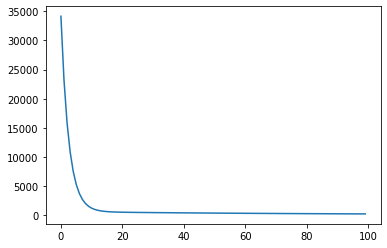

In [41]:
import matplotlib.pyplot as plt
plt.plot(losses);

In [42]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(216.2005, grad_fn=<DivBackward0>)


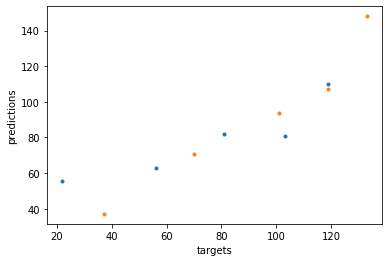

In [43]:
# Plot predictions vs targets
#  In order to get from tensors to numpy arrays that we can plot, we'll have to:
#     - call detach() to return a copy with just the data and not the gradient
#     - call numpy() to return a numpy array, since matplotlib doesn't know how to plot tensors
plt.plot(targets.detach().numpy(),preds.detach().numpy(),'.');
plt.xlabel('targets');
plt.ylabel('predictions');

Not too shabby.

Now we've seen how to implement the main training loop in pytorch. But we did almost everything else manually.

Let's see what it would look like if we did the same thing but now using pytorch's built-in features.

# Linear Regression with Pytorch -- the right way

Instead of doing everything ourselves, we are going to take advantage of the many tools and methods that pytorch has built into it. This includes:
- Dataset and Dataloader objects
- Neural network layers
- Optimizers
- Various predefined loss functions

## Dataset and DataLoader

First we need to import some stuff (we don't *have* to import these into our namespace, since they can be accessed from `torch.`, but it makes the calls shorter):

In [0]:
# Import tensor dataset & data loader
from torch.utils.data import TensorDataset, DataLoader

We can use the `TensorDataset` class to handle our data. One of the things this does is it lets us grab a row from the inputs and target as a tuple: 

In [0]:
# Define dataset
train_ds = TensorDataset(inputs, targets)

In [46]:
# Now we can get rows:
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

Next, we will use pytorch's `DataLoader` which allows can split the data into batches when we train (and even shuffle or resample, if we want). This is useful because in many cases datasets are too big to process completely. Shuffling data when training is almost always a good idea and resampling is useful if our data is imbalanced in some way.

We'll define the `batch_size` when create the DataLoader. This is just the number of rows of the data that we will train over in a single epoch.

In [0]:
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [48]:
next(iter(train_dl)) # this will return 5 (batch_size) rows of inputs and targets after shuffling. 
# iter() defines an iterator and next() tells python to get the next iteration from it.

[tensor([[ 87., 134.,  58.],
         [ 91.,  88.,  64.],
         [ 69.,  96.,  70.],
         [102.,  43.,  37.],
         [ 73.,  67.,  43.]]), tensor([[119., 133.],
         [ 81., 101.],
         [103., 119.],
         [ 22.,  37.],
         [ 56.,  70.]])]

## Use a predefined linear layer -- nn.Linear()

Instead of:
- defining weights and biases tensors manually
- defining the linear function that uses weights nad biases to relate input to ouput via a matrix multiplication
- initializing weights and biases to random values

We can just use a layer that already does all that: ``torch.nn.Linear()``

In [0]:
model = torch.nn.Linear(3,2)

## Optimizer

Instead of manually implementing Gradient Descent to adjust weights and biases according to the gradient and some learning rate, we can use one of Pytorch's built-in optimizers.

Here we won't use Gradient Descent (GD), but Stochastic Gradient Descent (SGD). The difference is that in SGD, you adjust your weights and biases not after one complete pass over all the training data, but after a batch. It's stochastic because the data loader shuffles the data and so the batches seen will change from run to run (or epoch to epoch).  

In [0]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5) # lr is the learning rate

## Loss function

Instead of using our manually defined `mse()` function, we'll use a predefined one.

In [0]:
loss_fn = torch.nn.functional.mse_loss

So, for example, we could compute the loss:

In [52]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(8434.4795, grad_fn=<MseLossBackward>)


## Define a fit function

Finally we will define a function to fit our model by putting all of the above pieces together:

In [0]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl: # sample on batch of inputs,targets
            # Generate predictions and calculate loss
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step() # this tells the optimizer to take one step -- it already knows about model parameters and the learning rate as we passed them when we create opt
            opt.zero_grad() # tell the optimizer to zero the gradient so we start fresh on the next batch
    print('Training loss: ', loss_fn(model(inputs), targets))

## Fit the model

Now we can train the model by running our fit function:

In [54]:
# Train the model for 100 epochs
fit(100, model, loss_fn, opt)

Training loss:  tensor(53.0385, grad_fn=<MseLossBackward>)


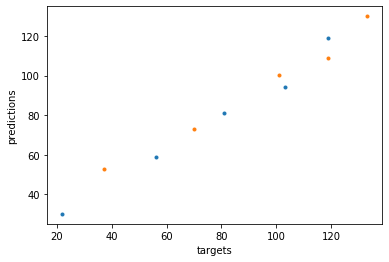

In [55]:
# Get the predictions
preds=model(inputs)

# Plot predictions vs targets
plt.plot(targets.detach().numpy(),preds.detach().numpy(),'.');
plt.xlabel('targets');
plt.ylabel('predictions');

One important thing that we DID NOT DO in the above two examples is that we didn't split the data into training and test sets.  We could have accomplished this using:
```
train_ds,test_ds = torch.utils.data.random_split(full_ds,[len_train, len_test])
```

But we didn't do this because this was just for illustration purposes and the dataset we are using is pretty small.